In [1]:
import pandas as pd
import numpy as np
import pickle
!pip install emoji
!pip install nltk
!pip install gensim
!pip install validators

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 7.4 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=a957b384cd698305a9734e9c61ee393faed90148d621db6be1b52bec66859c18
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for validators: filename=validators-0.19.0-py3-none-any.whl size=19553 sha256=5f3adead56186ac63f5f98f3090e30baf718bc880110ba852b72e444700c4d22
  Stored in directory: /root/.cache/pip/wheels/fe/5d/69/ff53a908b9f14fb7730a58fdede0fac4cdc99ef3624ec76d05


In [3]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
#os.chdir(r'/content/gdrive/My Drive/CSE5095 Social Mining/Dataset/')
os.chdir(r'/content/gdrive/My Drive/Social Media Research-Hieu/CSE5095 Social Mining Project/Dataset/')
#os.chdir(r'/content/gdrive/My Drive/CSE5095 Social Mining/Data/')
!ls

 0_2.csv	  DNN_model
 0_2.gsheet	  ntua_twitter_300.txt
 1_2.csv	  project10-michigan-offensive.csv
 1_2.gsheet	  project10-michigan-yes-no_updated.csv
 1_PCA_2.csv	  project11-michigan-offensive.csv
 1_PCA_2.gsheet  'RF Feature Importance.png'
 CNN_model	  YN_df_indic2.csv
 df_indic.csv	  YN_df_names2.csv
 df_names.csv	  YN_df_values2.csv
 df_values.csv


In [5]:
import collections
import matplotlib.pyplot as plt
import statistics
import warnings
import tensorflow as tf
#import arg as arg
import nltk as nl
import numpy as np
import string
import re
from keras.layers.merge import concatenate
from sklearn import preprocessing
from gensim.models import word2vec
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.layers import LSTM, Embedding, SpatialDropout1D, Dense
# from tensorflow.python.keras.tests.model_architectures import lstm
from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier
from wordcloud import WordCloud
import nltk
import textblob
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from setuptools.command.test import test
from sklearn.feature_extraction.text import TfidfVectorizer
import emoji as emoji
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import multilabel_confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, \
    roc_auc_score, cohen_kappa_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import svm
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import chi2
from nltk.corpus import words
import validators
import gensim
from sklearn.linear_model import LogisticRegression
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from itertools import islice
#nltk.download()
from keras.preprocessing import sequence

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
nltk.download('words')
nltk.download('stopwords')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# cachedStopWords = stopwords.words('english')
# dictionary = dict.fromkeys(words.words(), None)

def check_valid_word(word):
    if word not in cachedStopWords:
        '''try:
            x = dictionary[word]
            return True
        except KeyError:
            return False'''
        return True

    else:
        return False
def is_english(word):
    try:
        x = dictionary[word]
        return True
    except KeyError:
        return False

def textBlob_sentiment_score(x):
    return textblob.TextBlob(x).polarity

def vader_sentiment_score(tweet):
    return SentimentIntensityAnalyzer().polarity_scores(tweet)['compound']

def convert_emoticons(sentence):
    sentence = sentence.replace(":'(", " crying ")
    sentence = sentence.replace("(y)", " thumbs up ")
    sentence = sentence.replace(":x", " kiss ")
    sentence = sentence.replace(":3", " goofy ")
    sentence = sentence.replace(":)", " happy ")
    sentence = sentence.replace(":(", " sad ")
    return sentence
def remove_valid_links(tweet):
    links = re.findall(r'\b(?:(?:https?|ftp)://)?\w[\w-]*(?:\.[\w-]+)+\S*', tweet)
    for link in links:
        if validators.url(link):
            tweet = re.sub(link, ' ', tweet)
    return tweet

def sentence_preprocessor(sentence):

    sentence = sentence.lower()
    sentence = convert_emoticons(sentence)
    sentence = emoji.demojize(sentence)
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    sentence = remove_valid_links(sentence)
    sentence = re.sub(r'[^\w\s]', '', sentence)
    sentence = re.sub('[0-9]+', '', sentence)
    new_sentence = ""
    words = sentence.split()
    for word in words:
        word =  PorterStemmer().stem(word)

        if (check_valid_word(word)):
            new_sentence += word + " "

    new_sentence = new_sentence.strip()
    new_sentence = remove_uninformative_words(new_sentence)
    return new_sentence 

def perform_preprocessing(vaccine_data):
    vaccine_data["text"] = vaccine_data["text"].apply(lambda s: sentence_preprocessor(s) if type(s) == str else s)
    #print(vaccine_data["text"])
    return vaccine_data

def remove_list_of_words(list, sentence):
    for word in list:
        sentence = sentence.replace(word,"")
    return sentence 

def remove_uninformative_words(sentence):
    #sentence = remove_list_of_words([" antivaxx ", " vaccin ", " vaccineswork ", " antivax ", " thi ", " covid "," peopl ", " get ", " amp ",
                                    # " ha ", " wa ", " make ", " go ", " coronaviru ", " think ", " whi ", " like ", " need ", " think ", " one ", " us ", " say ", " ita ", " take ", " right " ],sentence)
    sentence = remove_list_of_words(["antivax","antivaxx","covid", "vaccin","vaccineswork","vaccinesarenottheansw","coronavirus",
                                     "just","get","via","much","like","now","one","use","also","tell","lot","look","live","will","see",
                                     "see","dont","tri","say","amp","theyr","cant","even","anti","take","can","want","shes","well","thing",
                                     "group","come","actual","still","actual","give","care","way","show","new","put","read","make","call",
                                     "peopl","fufuu","isnt","feel","yall","didnt","got","need","test","know","immunizedotca","time","year",
                                     "right","mani","big","sure","claim","back","healthscience","talk","system","antivaccine","hes","day","date",
                                     "let","bet","guy","far","sinc","page","link","guess","mom","forc","hey","dog","condit",
                                     "provid","thegoodgodabove","marcusblimi","immunizedotca",
                                    "elonjam","couldnt","gullibi","fransrech","gonna",
                                    "cameronwilson","forc","said","watch","away",
                                    "therickwilson","kathmarv","franldelia",
                                    "chrisjohnsonmd","mamadeb","ipaworldorg","click","yet",
                                    "doesnt","whole","ever","find","near","yes","mcfunni",
                                    "must","full","ear","without","ask","due","agr","pjmoor",
                                    "macbarid","jestrbob","yeah","krebiozen",
                                    "vaccinesarenottheans","vaccineagenda","found","home",
                                    "frankdelia","melindafirst","https","tco","vaxxer","fufuufufuufufuu",
                                    "kevinroos","zabotxdyjz","kbghyyh","clccalala","ajpollard","vaxx",
                                    "fltvqjqkmm","fltvqjnm","tytvftwq","asovtgqf","soezdwsc","vnouhhpyl",
                                    "kmolgehqu","sjhjifx","vnouhhpyl","tuesdaythough","psguqvu",
                                    "themelyssak","karinagould","other","wa","ha","think","trump"], sentence)
    return sentence


def get_text_from_data(tweets):
    return ' '.join(tweets['text'])

def create_wordcloud(preprocessed_data):
    pro_tweets = preprocessed_data.loc[preprocessed_data['Label'] == 0]
    anti_tweets = preprocessed_data.loc[preprocessed_data['Label'] == 1]

    pro_wordcloud = WordCloud().generate(get_text_from_data(pro_tweets))
    anti_wordcloud = WordCloud().generate(get_text_from_data(anti_tweets))
    overall_wordcloud = WordCloud().generate(get_text_from_data(preprocessed_data))

    plt.imshow(overall_wordcloud)
    plt.title("Wordcloud for All Classes")
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

    plt.imshow(pro_wordcloud)
    plt.title("Positive Class Wordcloud")
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

    plt.imshow(anti_wordcloud)
    plt.title("Negative Class Wordcloud")
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()



def get_top_ten_words(preprocessed_data, labels):
    preprocessed_unique_words = []
    pro_words = []
    anti_words = []
    for index, row in preprocessed_data.iterrows():
        sentence = row["text"]
        labels = row["Label"]
        words_in_sentence = sentence.split()
        for word in words_in_sentence:
            preprocessed_unique_words.append(word)
            if labels == 0:
                pro_words.append(word)
            elif labels == 1:
                anti_words.append(word)

    pro_count = collections.Counter(pro_words)
    anti_count = collections.Counter(anti_words)
    '''print("Pro top 10: ", pro_count.most_common(10))
    print("Anti top 10: ", anti_count.most_common(10))'''

def social_features(vaccine_data):
    display_text_width = []
    is_quote_list = []
    is_tweet_list = []
    followers_count_list = []
    friends_count_list = []
    listed_count_list = []
    statuses_count_list = []
    favourites_count_list = []
    verifieds_list = []
    favorite_count_list = []
    quoted_favorite_count_list = []
    quoted_retweet_count_list = []
    quoted_followers_count_list = []
    quoted_friends_count_list = []
    quoted_statuses_count_list = []
    retweet_count_list = []
    location_list = []
    verified_list = []
    is_retweet_list = []
    favourites_count_list = []
 
    for index, row in vaccine_data.iterrows():
        text_width = row['display_text_width']
        display_text_width.append(text_width)
        is_quote = row['is_quote']
        is_quote_list.append(is_quote)
        is_retweet = row['is_retweet']
        is_retweet_list.append(is_retweet)
        favorite_count = row['favorite_count']
        favorite_count_list.append(favorite_count)  
        followers_count = row['followers_count']
        followers_count_list.append(followers_count) 
        friends_count = row['friends_count']
        friends_count_list.append(friends_count) 
        listed_count = row['listed_count']
        listed_count_list.append(listed_count) 
        favourites_count = row['favourites_count']
        favourites_count_list.append(favourites_count) 
        verified = row['verified']
        verified_list.append(verified) 

        #quoted_statuses_count_list.append(quoted_statuses_count)
        #display_text_width	is_quote	is_retweet	favorite_count	location	followers_count	friends_count	listed_count	favourites_count	verified

    social_feature_data = {
            'display_text_width': display_text_width,
            'is_quote': is_quote_list,
                   #'listed_count': listed_count_list,
                   'is_retweet': is_retweet_list,
                    'favorite_count':favorite_count_list, 
                    'followers_count': followers_count_list,
                    'friends_count': friends_count_list,
                    'listed_count': listed_count_list,
                    'favourites_count': favourites_count_list,
                    'verified': verified_list

    } 
    df1 = pd.DataFrame(social_feature_data)
    #df1 = df1.fillna(0)
    #print(df1)
    # apply SelectKBest class to extract top 10 best features
    #print(df1)
    x = df1.values  # returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df1 = pd.DataFrame(x_scaled)
    print(".......minmax scaler..")
    print(df1)
    #print(df1)
    #saving the dataframe


    return df1


def get_metadata(vaccine_data):
    number_of_questionmark = []
    number_of_exclamationmark = []
    number_of_periodmark = []
    number_of_quotationmark = []
    number_of_quotationmark1 = []
    hashtag_counts = []
    mention_counts = []
    punctuation_counts = []
    link_counts = []
    capital_word_counts = []
    vader_scores = []
    textblob_scores = []
    Y = vaccine_data.loc[:, 'Label']

    for index, row in vaccine_data.iterrows():
        tweet = row['text']
        links = re.findall(r'\b(?:(?:https?|ftp)://)?\w[\w-]*(?:\.[\w-]+)+\S*', tweet)
        link_counts.append(len(links))

        count = lambda l1, l2: len(list(filter(lambda c: c in l2, l1)))
        punctuation_count = count(tweet, string.punctuation)
        punctuation_counts.append(punctuation_count)

        question_count = count(tweet,"?")
        number_of_questionmark.append(question_count)

        exclamation_count = count(tweet, "!")
        number_of_exclamationmark.append(exclamation_count)

        period_count = count(tweet, "?")
        number_of_periodmark.append(period_count)

        quotation_count = count(tweet, "\'")
        number_of_quotationmark.append(quotation_count)

        quotation_count1 = count(tweet, "\"")
        number_of_quotationmark1.append(quotation_count1)

        textBlob_score = textBlob_sentiment_score(tweet)
        textblob_scores.append(textBlob_score)

        vader_score = vader_sentiment_score(tweet)
        vader_scores.append(vader_score)


        words = tweet.split()
        hashtag_count = 0
        mention_count = 0
        capital_word = 0
        for word in words:
            if word.startswith('#'):
                hashtag_count += 1
            elif word.startswith('@'):
                mention_count += 1
            elif word.isupper():
                capital_word += 1


        hashtag_counts.append(hashtag_count)
        mention_counts.append(mention_count)
        capital_word_counts.append(capital_word)

    data = {'hashtag_counts': hashtag_counts,
            'mention_counts': mention_counts,
            'punctuation_counts': punctuation_counts,
            'link_counts': link_counts,
            'capital_word_counts': capital_word_counts,
            'number_of_questionmark': number_of_questionmark,
            'number_of_exclamationmark': number_of_exclamationmark,
            'number_of_periodmark' : number_of_periodmark,
            #'number_of_quotationmark' : number_of_quotationmark,
            #'number_of_quotationmark1' : number_of_quotationmark1,
            #'vader_scores': vader_scores,
            #'textblob_score': textblob_scores
            }
    df = pd.DataFrame(data)
    return df, hashtag_counts

def tf_idf_vectorize(tweet_dataframe):
    corpus = tweet_dataframe.loc[:, "new_text_filter"]
    Y = tweet_dataframe.loc[:, "Label"]
    unigram_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=2000)
    unigram_tf_idf = unigram_vectorizer.fit_transform(corpus)
    names = {v:i for i, v in enumerate(unigram_vectorizer.get_feature_names())}
    return unigram_tf_idf, names, Y

def tf_idf_POS_vectorize(corpus): 
    unigram_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=2000)
    unigram_tf_idf = unigram_vectorizer.fit_transform(corpus)
    names = {v:i for i, v in enumerate(unigram_vectorizer.get_feature_names())}
    return unigram_tf_idf, names

def emotion(df,classifier):
  for idx, row in df.iterrows():
    prediction = classifier(row['new_text_filter'])
    df.loc[idx, 'sadness'] = prediction[0][0]['score']
    df.loc[idx, 'joy'] = prediction[0][1]['score']
    df.loc[idx, 'love'] = prediction[0][2]['score']
    df.loc[idx, 'anger'] = prediction[0][3]['score']
    df.loc[idx, 'fear'] = prediction[0][4]['score']
    df.loc[idx, 'surprise'] = prediction[0][5]['score']
  return df[['sadness','joy','love','anger','fear','surprise']]
  


def word_embedding_2(preprocessed_data):
    train = []
    # getting only the first 4 columns of the file
    for index, row in preprocessed_data.iterrows():
        sentence = row["new_text_filter"]
        train.append(sentence)

    # Create an array of tokens using nltk
    tokens = [nl.word_tokenize(sentences) for sentences in train]

    model = gensim.models.Word2Vec(tokens, size=32, min_count=1, workers=4)
    print("\n Training the word2vec model...\n")
    # reducing the epochs will decrease the computation time
    model.train(tokens, total_examples=len(tokens), epochs=40)
    first_value_means = []
    second_value_means = []
    third_value_means = []
    fourth_value_means = []
    fifth_value_means = []
    sixth_value_means = []
    seventh_value_means = []
    eights_value_means = []
    ninth_value_means = []
    tenth_value_means = []


    for index, row in preprocessed_data.iterrows():
        sentence = row["new_text_filter"]
        word_array = []
        first_value = []
        second_value = []
        third_value = []
        fourth_value = []
        fifth_value = []
        sixth_value = []
        seventh_value = []
        eights_value = []
        ninth_value = []
        tenth_value = []
        for word in nl.word_tokenize(sentence):
            word_2_vec_value = model[word]
            #print(word_2_vec_value)
            first_value.append(word_2_vec_value[0])
            second_value.append(word_2_vec_value[1])
            third_value.append(word_2_vec_value[2])
            fourth_value.append(word_2_vec_value[3])
            fifth_value.append(word_2_vec_value[4])
            sixth_value.append(word_2_vec_value[5])
            seventh_value.append(word_2_vec_value[6])
            eights_value.append(word_2_vec_value[7])
            ninth_value.append(word_2_vec_value[8])
            tenth_value.append(word_2_vec_value[9])
        # word_array = [statistics.mean(first_values), statistics.mean(second_values)]
        if len(first_value) > 0:
            first_value_means.append(statistics.mean(first_value))
        else:
            first_value_means.append(0.0)
        if len(second_value) > 0:
            second_value_means.append(statistics.mean(second_value))
        else:
            second_value_means.append(0.0)
        if len(third_value) > 0:
            third_value_means.append(statistics.mean(third_value))
        else:
            third_value_means.append(0.0)
        if len(fourth_value) > 0:
            fourth_value_means.append(statistics.mean(fourth_value))
        else:
            fourth_value_means.append(0.0)
        if len(fifth_value) > 0:
            fifth_value_means.append(statistics.mean(fifth_value))
        else:
            fifth_value_means.append(0.0)
        if len(sixth_value) > 0:
            sixth_value_means.append(statistics.mean(sixth_value))
        else:
            sixth_value_means.append(0.0)
        if len(seventh_value) > 0:
            seventh_value_means.append(statistics.mean(seventh_value))
        else:
            seventh_value_means.append(0.0)
        if len(eights_value) > 0:
            eights_value_means.append(statistics.mean(eights_value))
        else:
            eights_value_means.append(0.0)
        if len(ninth_value) > 0:
            ninth_value_means.append(statistics.mean(ninth_value))
        else:
            ninth_value_means.append(0.0)
        if len(tenth_value) > 0:
            tenth_value_means.append(statistics.mean(tenth_value))
        else:
            tenth_value_means.append(0.0)


    data = {'first_value_wordembedding': first_value_means,
            'second_value_wordembedding': second_value_means,
            'third_value_wordembedding': third_value_means,
            'fourth_value_wordembedding': fourth_value_means,
            'fifth_value_wordembedding': fifth_value_means,
            'sixth_value_wordembedding': sixth_value_means,
            'seventh_value_wordembedding': seventh_value_means,
            'eighth_value_wordembedding': eights_value_means,
            'ninth_value_wordembedding': ninth_value_means,
            'tenth_value_wordembedding': tenth_value_means

            }
    #print(len(data))
    df = pd.DataFrame(data)
    #print(df)
    return df



def get_distribution_of_unique_words(vaccine_data, labels):
    pro_tweets = vaccine_data.loc[vaccine_data['Label'] == 0]
    anti_tweets = vaccine_data.loc[vaccine_data['Label'] == 1]
    preprocessed_unique_words = set()
    pro_unique_words = set()
    anti_unique_words = set()

    total_words_counts = [0, 0, 0]

    for index, row in vaccine_data.iterrows():

        sentence = row["text"]
        label = row["Label"]
        words_in_sentence = sentence.split()
        number_of_words = len(words_in_sentence)
        total_words_counts[0] += number_of_words
        if label == 0:
            total_words_counts[1] += number_of_words
        elif label == 1:
            total_words_counts[2] += number_of_words
        for word in words_in_sentence:
            if label == 0 and not (word in pro_unique_words):
                pro_unique_words.add(word)

            elif label == 1 and not (word in anti_unique_words):
                anti_unique_words.add(word)

            preprocessed_unique_words.add(word)

    print("Total number of words in " + labels[0] + " class", (total_words_counts[1]))
    print("Total number words in " + labels[1] + " class", (total_words_counts[2]))
    print("Total number of total words: ", (total_words_counts[0]))

    print("Average number of words in " + labels[0] + " class", (total_words_counts[1]) / len(pro_tweets))
    print("Average number of  words: in " + labels[1] + " class", (total_words_counts[2]) / len(anti_tweets))
    print("Average number of total words: ", (total_words_counts[0]) / len(vaccine_data))

    print("Total unique words after preprocessing: ", len(preprocessed_unique_words))
    print("Total unique words in " + labels[0] + " class: ", len(pro_unique_words))
    print("Total unique words in " + labels[1] + " class: ", len(anti_unique_words))
    #print(preprocessed_unique_words)'''

def most_common_hashtag(vaccine_data):
    pro_hashtag = []
    anti_hashtag = []

    for index, row in vaccine_data.iterrows():
        sentence = str(row["hashtags"])
        hashtags = sentence.split()
        sentiment = row["Label"]
        for word in hashtags:
            if sentiment == 0 and word != "nan":
                pro_hashtag.append(word)
            elif sentiment == 1 and word != "nan":
                anti_hashtag.append(word)
    pro_counter = collections.Counter(pro_hashtag)
    anti_counter = collections.Counter(anti_hashtag)
    print("Top 10 most common pro_vaccine hashtags: ", pro_counter.most_common(10))
    print("Top 10 most common anti_vaccine hashtags: ", anti_counter.most_common(10))

def run_supervised_ML(all_data, Y, labels):
    Y = Y.astype('int')


    X_train, X_test, y_train, y_test = train_test_split(all_data, Y,
                                                        stratify=Y,
                                                        test_size=0.25)

    '''X_train, X_test, y_train, y_test = train_test_split(
        all_data, Y, test_size=0.2, random_state=42)'''


    print("MLP")
    warnings.filterwarnings('ignore')
    clf = MLPClassifier(activation='relu', hidden_layer_sizes=(10, 8, 5, 2), max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)


    print("Accuracy: " + str(round(sklearn.metrics.accuracy_score(y_test, y_pred), 2)))
    print("Precision : " + str(round(sklearn.metrics.precision_score(y_test, y_pred), 4)))

    print("Recall/Sensitivity : " + str(round(sklearn.metrics.recall_score(y_test, y_pred), 4)))

    print("f1_score: " + str(round(sklearn.metrics.recall_score(y_test, y_pred, average='macro'), 4)))
    print("Feature Importances: ")
    #print(clf.feature_importances_[-10:])

    print("\nRF")
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train, y_train)
    '''print("Feature Importances: ")
    print("Meta data importance: %f",sum(clf.feature_importances_[-20:-9]))
    print("Social data importance: %f", sum(clf.feature_importances_[-8:]))'''

    y_pred = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("Accuracy: " + str(round((tp + tn) / (tn + fp + tp + fn), 2)))
    print("Recall/Sensitivity : " + str(sklearn.metrics.recall_score(y_test, y_pred)))
    print("Specificity : " + str(round(tn / (tn + fp), 2)))
    print("Feature Importances: ")
    #print(clf.feature_importances_[-10:])
    # get importance
    importance = clf.feature_importances_
    # summarize feature importance
    tfidf_importance = sum(importance[0:2000])
    metadata_importance = sum(importance[2000:2008])
    social_importance = sum(importance[2008:2017])
    wordembedding_importance = sum(importance[2017:2027])
    labels = ['TF-IDF', 'Word Embeddings', 'Auxiliary', 'Social']
    sizes = [tfidf_importance, wordembedding_importance, metadata_importance, social_importance]
    explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=180)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    # plt.tight_layout()
    plt.show()


    rf_precision = sklearn.metrics.precision_score(y_test, y_pred)
    rf_recall = sklearn.metrics.recall_score(y_test, y_pred)
    rf_f1_score = 2 * rf_recall * rf_precision / (rf_precision + rf_recall + 0.000001)
    print("precision: " "%.3f" % rf_precision)
    print("recall: " "%.3f" % rf_recall)
    print("f1_score: " "%.3f" % rf_f1_score)

    print("\n Gradient Boosting")
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                     max_depth=1, random_state=0).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("Accuracy: " + str(round((tp + tn) / (tn + fp + tp + fn), 2)))
    print("Recall/Sensitivity : " + str(round(tp / (tp + fn), 2)))
    gb_precision = sklearn.metrics.precision_score(y_test, y_pred)
    print("precision: " "%.3f" % gb_precision)
    print("Specificity : " + str(round(tn / (tn + fp), 2)))
    gb_precision = sklearn.metrics.precision_score(y_test, y_pred)
    gb_recall = sklearn.metrics.recall_score(y_test, y_pred)
    gb_f1_score = 2 * gb_recall * gb_precision / (gb_precision + gb_recall + 0.000001)
    print("f1_score: " "%.3f" % gb_f1_score)
    print("Feature Importances: ")
    #print(clf.feature_importances_[-10:])


    print("\nSVM")
    clf = svm.SVC(kernel='linear', probability=True)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy: " + str(sklearn.metrics.accuracy_score(y_test, y_pred)))
    print("Recall/Sensitivity : " + str(sklearn.metrics.recall_score(y_test, y_pred)))
    print("Specificity : " + str(round(tn / (tn + fp), 2)))

    svm_precision = sklearn.metrics.precision_score(y_test, y_pred)
    svm_recall = sklearn.metrics.recall_score(y_test, y_pred)
    svm_f1_score = 2 * svm_precision * svm_recall / (svm_precision + svm_recall + 0.000001)

    print("precision: %.3f" % svm_precision)
    print("recall: %.3f" % svm_recall)
    print("f1_score: %.3f" % svm_f1_score)
    print("Feature Importances: ")
    #print(clf.feature_importances_[-10:])

In [ ]:
#data1 = pd.read_csv("/content/gdrive/My Drive/CSE5095 Social Mining/Dataset/project10-michigan-yes-no_updated.csv",encoding="latin-1") 
#data3 =pd.read_csv("/content/gdrive/My Drive/CSE5095 Social Mining/Dataset/project11-michigan-offensive.csv",encoding="latin-1")

data1 = pd.read_csv("/content/gdrive/My Drive/Social Media Research-Hieu/CSE5095 Social Mining Project/Dataset/project10-michigan-yes-no_updated.csv",encoding="latin-1") 
data3 =pd.read_csv("/content/gdrive/My Drive/Social Media Research-Hieu/CSE5095 Social Mining Project/Dataset/project11-michigan-offensive.csv",encoding="latin-1")


#data1 = pd.read_csv("/content/gdrive/My Drive/CSE5095 Social Mining/Data/project10-michigan-yes-no_updated.csv",encoding="latin-1") 
#data3 =pd.read_csv("/content/gdrive/My Drive/CSE5095 Social Mining/Data/project11-michigan-offensive.csv",encoding="latin-1")


In [ ]:
#columns = ['text','O/NO','Y/N','S/NS','display_text_width','is_quote','is_retweet','favorite_count',
#           'location','followers_count','friends_count',
#           'listed_count','favourites_count','verified']
columns = ['text','Y/N','display_text_width','is_quote','is_retweet','favorite_count',
           'location','followers_count','friends_count',
           'listed_count','favourites_count','verified','hashtags','description','mentions_screen_name']

In [ ]:
data1 = data1[columns] 
data3 = data3[columns]

In [ ]:
data1['Y/N'].value_counts()

N     2639
Y      931
NS       1
Name: Y/N, dtype: int64

In [ ]:
data3['Y/N'].value_counts()

N     2990
Y      956
N        1
Name: Y/N, dtype: int64

In [ ]:
frames = [data1, data3]
data = pd.concat(frames)
data = data.reset_index()

In [ ]:
data.shape

(7518, 16)

In [ ]:
#data = data[['text','O/NO','Y/N','S/NS']].dropna()
# data.dropna(inplace=True)
#test_data = test_data[['text','O/NO','Y/N','S/NS']].dropna()
data.head()
data
data = data.groupby('Y/N').filter(lambda x : len(x)>3)

In [ ]:
data = data.reset_index()
data['Y/N'].value_counts()
no_index=[]; o_index=[]
for i in range(len(data['Y/N'])):
  if data['Y/N'][i]=='N':
    no_index.append(i)
  elif data['Y/N'][i]=='Y':
    o_index.append(i)

import random
random.shuffle(no_index)

In [ ]:
from sklearn.utils import resample

In [ ]:

X = data

# Display new class counts

#X = pd.concat(frames)
# X = X.reset_index()
X = X.drop(columns=['index', 'level_0'])
X['Y/N'].value_counts()

N    5629
Y    1887
Name: Y/N, dtype: int64

In [ ]:
!pip install nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#X['O/NO']
arranged_data = X.copy()
#X["new_text"] = X["new_text"]
arranged_data['Label'] = X['Y/N']
arranged_data = arranged_data.drop(['Y/N'], axis=1)
#arranged_data = arranged_data[['text','Label']].dropna()

In [ ]:
social_feature = social_features(arranged_data)

.......minmax scaler..
             0    1    2         3         4         5         6         7  \
0     0.595395  0.0  0.0  0.000000  0.000700  0.006191  0.001485  0.029778   
1     0.838816  0.0  0.0  0.000061  0.000700  0.006191  0.001485  0.029778   
2     0.898026  0.0  0.0  0.000000  0.000045  0.000474  0.000000  0.009338   
3     0.878289  0.0  0.0  0.000000  0.000306  0.000585  0.000195  0.022276   
4     0.723684  0.0  0.0  0.000000  0.000086  0.001259  0.000000  0.001762   
...        ...  ...  ...       ...       ...       ...       ...       ...   
7511  0.575658  1.0  0.0  0.000000  0.000150  0.006277  0.000146  0.016049   
7512  0.476974  0.0  0.0  0.000030  0.001001  0.020458  0.000487  0.190762   
7513  0.871711  1.0  0.0  0.002276  0.001632  0.030048  0.000049  0.012047   
7514  0.532895  0.0  0.0  0.000000  0.000750  0.016222  0.000584  0.030495   
7515  0.365132  1.0  0.0  0.000000  0.000042  0.001881  0.000024  0.076194   

        8  
0     0.0  
1     0.0  
2   

In [ ]:
meta_data, hashtags = get_metadata(arranged_data) 

In [ ]:
X = arranged_data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem.porter import *
import string
import re
nltk.download('stopwords')
stopwords=stopwords = nltk.corpus.stopwords.words("english")

other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)

stemmer = PorterStemmer() 

def preprocess(text_string):
    """
    Accepts a text string and replaces:
    1) urls with URLHERE
    2) lots of whitespace with one instance
    3) mentions with MENTIONHERE

    This allows us to get standardized counts of urls and mentions
    Without caring about specific people mentioned
    """
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', text_string)
    parsed_text = re.sub(giant_url_regex, '', parsed_text)
    parsed_text = re.sub(mention_regex, '', parsed_text)
    #parsed_text = parsed_text.code("utf-8", errors='ignore')
    return parsed_text

def tokenize(tweet):
    """Removes punctuation & excess whitespace, sets to lowercase,
    and stems tweets. Returns a list of stemmed tokens."""
    tweet = " ".join(re.split("[^a-zA-Z]*", tweet.lower())).strip()
    #tokens = re.split("[^a-zA-Z]*", tweet.lower())
    tokens = [stemmer.stem(t) for t in tweet.split()]
    return tokens

def basic_tokenize(tweet):
    """Same as tokenize but without the stemming"""
    tweet = " ".join(re.split("[^a-zA-Z.,!?]*", tweet.lower())).strip()
    return tweet.split()

vectorizer = TfidfVectorizer(
    #vectorizer = sklearn.feature_extraction.text.CountVectorizer(
    tokenizer=tokenize,
    preprocessor=preprocess,
    ngram_range=(1, 3),
    stop_words=stopwords, #We do better when we keep stopwords
    use_idf=True,
    smooth_idf=False,
    norm=None, #Applies l2 norm smoothing
    decode_error='replace',
    max_features=10000,
    min_df=5,
    max_df=0.501
    )

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
X.hashtags

0                                                     NaN
1                                                     NaN
2                                                     NaN
3                                   thatwomanfrommichigan
4                                                     NaN
                              ...                        
7511                                      MichiganProtest
7512     Democrats MichiganProtest WhitmerMustResign Nazi
7513    ChrisCuomo GovernorCuomo InsleeMustGo GavinNew...
7514                       MichiganStrong MichiganProtest
7515    WhitmerFail whitmerresign MichiganProtest Croo...
Name: hashtags, Length: 7516, dtype: object

In [ ]:
def remove_valid_links(tweet):
    links = re.findall(r'\b(?:(?:https?|ftp)://)?\w[\w-]*(?:\.[\w-]+)+\S*', tweet)
    for link in links:
        if validators.url(link):
            tweet = re.sub(link, ' ', tweet)
    return tweet
    
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 text = re.sub(r'[^\x00-\x7F]+',' ', text)
 text = re.sub('<\S+','', text)
 text = re.sub('Lansing',' ',text)
 text = re.sub('lansing',' ',text)
 text = re.sub('Michigan',' ',text)
 text = re.sub('people',' ',text)
 text = re.sub('MI',' ',text)
 text = re.sub('today',' ',text)
 text = text.translate(str.maketrans('', '', string.punctuation))
 text = remove_valid_links(text)
 text = re.sub(r'[^\w\s]', '', text)
 text = re.sub('[0-9]+', '', text)

 return text
# Clean the tweets
X['description'] = X['description'].fillna("")
X['hashtags'] = X['hashtags'].fillna("")
X['mentions_screen_name'] = X['mentions_screen_name'].fillna("")

X['new_text'] = X['text'].apply(cleanTxt)
X['description_proc'] = X['description'].apply(cleanTxt)

X['hashtags'] = X['hashtags'].apply(cleanTxt)
X['hashtags_proc'] = X['hashtags'].str.lower()
X['hashtags_proc'] = X['hashtags_proc'].fillna('blank')


X['mentions_screen_name'] = X['mentions_screen_name'].apply(cleanTxt)
X['mentions_screen_name_proc'] = X['mentions_screen_name'].str.lower()
X['mentions_screen_name_proc'] = X['mentions_screen_name_proc'].fillna('blank')
#test_data['new_text'] = test_data['text'].apply(cleanTxt)
# Show the cleaned tweets
X.head()

,text,display_text_width,is_quote,is_retweet,favorite_count,location,followers_count,friends_count,listed_count,favourites_count,verified,hashtags,description,mentions_screen_name,Label,new_text,description_proc,hashtags_proc,mentions_screen_name_proc
0,Guys check out this drone footage over Lansing...,189,False,False,0,"Michigan, USA",2902,1514,61,19085,False,,Happily married. <f0><U+009F><U+0091><U+00A9><...,YouTube,Y,Guys check out this drone footage over yeste...,Happily married Blue Star Mother Grandmatobe...,,youtube
1,@muffnbear Our governor @GovWhitmer has a pres...,263,False,False,2,"Michigan, USA",2902,1514,61,19085,False,,Happily married. <f0><U+009F><U+0091><U+00A9><...,muffnbear GovWhitmer,Y,Our governor has a press conf and made it a ...,Happily married Blue Star Mother Grandmatobe...,,muffnbear govwhitmer
2,@PoitinJar @DonaldJTrumpJr I grew up in Lansin...,281,False,False,0,michigan!,187,116,0,5985,False,,âIâve already done extraordinary damage to...,PoitinJar DonaldJTrumpJr,N,I grew up in I m horrified ders would blo...,I ve already done extraordinary damage to the...,,poitinjar donaldjtrumpjr
3,"As a Michigander for my entire life, I support...",275,False,False,0,Eastern USA,1268,143,8,14277,False,thatwomanfrommichigan,~Mature Content Streamer~ In Da Face Gaming Co...,,N,As a der for my entire life I support thatwom...,Mature Content Streamer In Da Face Gaming Come...,thatwomanfrommichigan,
4,To all the mfks I know that live in Michigan I...,228,False,False,0,"Cedar Rapids, IA",356,308,0,1129,False,,RIP DONO! stay humble<f0><U+009F><U+0099><U+00...,,N,To all the mfks I know that live in Im just ...,RIP DONO stay humble,,


In [ ]:
#stemmer
#before_stem_data=data.copy()
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
X["new_text"] = X["new_text"].apply(lambda x: x.split()) 
X["new_text"] = X["new_text"].apply(lambda x: [stemmer.stem(i) for i in x]) 

X["description_proc"] = X["description_proc"].apply(lambda x: x.split()) 
X["description_proc"] = X["description_proc"].apply(lambda x: [stemmer.stem(i) for i in x]) 


X["hashtags_proc"] = X["hashtags_proc"].apply(lambda x: x.split()) 
X["hashtags_proc"] = X["hashtags_proc"].apply(lambda x: [stemmer.stem(i) for i in x]) 

X["mentions_screen_name_proc"] = X["mentions_screen_name_proc"].apply(lambda x: x.split()) 
X["mentions_screen_name_proc"] = X["mentions_screen_name_proc"].apply(lambda x: [stemmer.stem(i) for i in x]) 
X.head(5)

,text,display_text_width,is_quote,is_retweet,favorite_count,location,followers_count,friends_count,listed_count,favourites_count,verified,hashtags,description,mentions_screen_name,Label,new_text,description_proc,hashtags_proc,mentions_screen_name_proc
0,Guys check out this drone footage over Lansing...,189,False,False,0,"Michigan, USA",2902,1514,61,19085,False,,Happily married. <f0><U+009F><U+0091><U+00A9><...,YouTube,Y,"[guy, check, out, this, drone, footag, over, y...","[happili, marri, blue, star, mother, grandmato...",[],[youtub]
1,@muffnbear Our governor @GovWhitmer has a pres...,263,False,False,2,"Michigan, USA",2902,1514,61,19085,False,,Happily married. <f0><U+009F><U+0091><U+00A9><...,muffnbear GovWhitmer,Y,"[our, governor, has, a, press, conf, and, made...","[happili, marri, blue, star, mother, grandmato...",[],"[muffnbear, govwhitm]"
2,@PoitinJar @DonaldJTrumpJr I grew up in Lansin...,281,False,False,0,michigan!,187,116,0,5985,False,,âIâve already done extraordinary damage to...,PoitinJar DonaldJTrumpJr,N,"[i, grew, up, in, i, m, horrifi, der, would, b...","[i, ve, alreadi, done, extraordinari, damag, t...",[],"[poitinjar, donaldjtrumpjr]"
3,"As a Michigander for my entire life, I support...",275,False,False,0,Eastern USA,1268,143,8,14277,False,thatwomanfrommichigan,~Mature Content Streamer~ In Da Face Gaming Co...,,N,"[as, a, der, for, my, entir, life, i, support,...","[matur, content, streamer, in, da, face, game,...",[thatwomanfrommichigan],[]
4,To all the mfks I know that live in Michigan I...,228,False,False,0,"Cedar Rapids, IA",356,308,0,1129,False,,RIP DONO! stay humble<f0><U+009F><U+0099><U+00...,,N,"[to, all, the, mfks, i, know, that, live, in, ...","[rip, dono, stay, humbl]",[],[]


In [ ]:
def tostring(text):
    to_return=""
    for i in list(text):
        to_return += str(i) + " "
    to_return = to_return[:-1]
    return to_return
X['new_text_filter'] = X['new_text'].apply(tostring) 
X['description_proc_filter'] = X['description_proc'].apply(tostring) 
X['hashtags_proc_filter'] = X['hashtags_proc'].apply(tostring) 
X['mentions_screen_name_proc_filter'] = X['mentions_screen_name_proc'].apply(tostring) 

In [ ]:
X['description_proc_filter']

0       happili marri blue star mother grandmatob just...
1       happili marri blue star mother grandmatob just...
2       i ve alreadi done extraordinari damag to the c...
3       matur content streamer in da face game comedi ...
4                                     rip dono stay humbl
                              ...                        
7511    news histori health busi financ tech govt poli...
7512                                          libertarian
7513    husbandfathercarpenterstatsmanbenevol wordsmit...
7514    educ woman who vote for trump happi to final h...
7515    gator mom daughter grandson aiden granddaught ...
Name: description_proc_filter, Length: 7516, dtype: object

In [ ]:
X = perform_preprocessing(X)

NameError: ignored

In [ ]:
X['Label']

In [ ]:
TF_IDF, TF_IDF_names, Y = tf_idf_vectorize(X)
TF_IDF = TF_IDF.todense()
tf_idf_frame = pd.DataFrame(TF_IDF) 
tf_idf_frame.columns = TF_IDF_names

In [ ]:
TF_IDF_hashtags, TF_IDF_hashtags_names = tf_idf_POS_vectorize(X['hashtags_proc_filter'])
TF_IDF_description, TF_IDF_description_names = tf_idf_POS_vectorize(X['description_proc_filter'])
TF_IDF_mentions, TF_IDF_mentions_names = tf_idf_POS_vectorize(X['mentions_screen_name_proc_filter'])

TF_IDF_hashtags = TF_IDF_hashtags.todense()
TF_IDF_description = TF_IDF_description.todense()
TF_IDF_mentions = TF_IDF_mentions.todense()

tf_idf_hashtags_frame = pd.DataFrame(TF_IDF_hashtags) 
tf_idf_hashtags_frame.columns = TF_IDF_hashtags_names

tf_idf_description_frame = pd.DataFrame(TF_IDF_description) 
tf_idf_description_frame.columns = TF_IDF_description_names

tf_idf_mentions_frame = pd.DataFrame(TF_IDF_mentions) 
tf_idf_mentions_frame.columns = TF_IDF_mentions_names

In [ ]:
#Get POS tags for tweets and save as a string
tweets = X['new_text_filter']
nltk.download('averaged_perceptron_tagger')
tweet_tags = []
for t in tweets:
    tokens = basic_tokenize(preprocess(t))
    tags = nltk.pos_tag(tokens)
    tag_list = [x[1] for x in tags]
    #for i in range(0, len(tokens)):
    tag_str = " ".join(tag_list)
    tweet_tags.append(tag_str)
        #print(tokens[i],tag_list[i])

In [ ]:
#We can use the TFIDF vectorizer to get a token matrix for the POS tags
pos_vectorizer = TfidfVectorizer(
    #vectorizer = sklearn.feature_extraction.text.CountVectorizer(
    tokenizer=None,
    lowercase=False,
    preprocessor=None,
    ngram_range=(1, 3),
    stop_words=None, #We do better when we keep stopwords
    use_idf=False,
    smooth_idf=False,
    norm=None, #Applies l2 norm smoothing
    decode_error='replace',
    max_features=5000,
    min_df=5,
    max_df=0.501,
    )

In [ ]:
#Construct POS TF matrix and get vocab dict
#pos = pos_vectorizer.fit_transform(pd.Series(tweet_tags)).toarray()
#pos_vocab = {v:i for i, v in enumerate(pos_vectorizer.get_feature_names())}

pos, pos_vocab = tf_idf_POS_vectorize(tweet_tags)
pos = pos.todense()
pos_frame = pd.DataFrame(pos) 
pos_frame.columns = pos_vocab

In [ ]:
pos_frame

In [ ]:
!pip install vaderSentiment textstat

In [ ]:
#Now get other features
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as VS
from textstat.textstat import *

sentiment_analyzer = VS()

def count_twitter_objs(text_string):
    """
    Accepts a text string and replaces:
    1) urls with URLHERE
    2) lots of whitespace with one instance
    3) mentions with MENTIONHERE
    4) hashtags with HASHTAGHERE

    This allows us to get standardized counts of urls and mentions
    Without caring about specific people mentioned.
    
    Returns counts of urls, mentions, and hashtags.
    """
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    hashtag_regex = '#[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', text_string)
    parsed_text = re.sub(giant_url_regex, 'URLHERE', parsed_text)
    parsed_text = re.sub(mention_regex, 'MENTIONHERE', parsed_text)
    parsed_text = re.sub(hashtag_regex, 'HASHTAGHERE', parsed_text)
    return(parsed_text.count('URLHERE'),parsed_text.count('MENTIONHERE'),parsed_text.count('HASHTAGHERE'))

def other_features(tweet):
    """This function takes a string and returns a list of features.
    These include Sentiment scores, Text and Readability scores,
    as well as Twitter specific features"""
    ##SENTIMENT
    sentiment = sentiment_analyzer.polarity_scores(tweet)
    
    words = preprocess(tweet) #Get text only
    
    syllables = textstat.syllable_count(words) #count syllables in words
    num_chars = sum(len(w) for w in words) #num chars in words
    num_chars_total = len(tweet)
    num_terms = len(tweet.split())
    num_words = len(words.split())
    avg_syl = round(float((syllables+0.001))/float(num_words+0.001),4)
    num_unique_terms = len(set(words.split()))
    
    ###Modified FK grade, where avg words per sentence is just num words/1
    FKRA = round(float(0.39 * float(num_words)/1.0) + float(11.8 * avg_syl) - 15.59,1)
    ##Modified FRE score, where sentence fixed to 1
    FRE = round(206.835 - 1.015*(float(num_words)/1.0) - (84.6*float(avg_syl)),2)
    
    twitter_objs = count_twitter_objs(tweet) #Count #, @, and http://
    retweet = 0
    if "rt" in words:
        retweet = 1
    features = [FKRA, FRE,syllables, avg_syl, num_chars, num_chars_total, num_terms, num_words,
                num_unique_terms, sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound'],
                twitter_objs[2], twitter_objs[1],
                twitter_objs[0], retweet]
    #features = pandas.DataFrame(features)
    return features

def get_feature_array(tweets):
    feats=[]
    for t in tweets:
        feats.append(other_features(t))
    return np.array(feats)

In [ ]:
other_features_names = ["FKRA", "FRE","num_syllables", "avg_syl_per_word", "num_chars", "num_chars_total", \
                        "num_terms", "num_words", "num_unique_words", "vader neg","vader pos","vader neu", "vader compound", \
                        "num_hashtags", "num_mentions", "num_urls", "is_retweet"]

In [ ]:
feats = get_feature_array(X['new_text_filter'])
feats_dataframe = pd.DataFrame(feats)
feats_dataframe.columns = other_features_names

In [ ]:
feats_dataframe.shape

In [ ]:
word_embedding_dataframe = word_embedding_2(X) 

In [ ]:
tf_idf_frame

In [ ]:
social_feature.columns=['display_text_width', 'is_quote', 'is_retweet', 'favorite_count', 'followers_count', 'friends_count', 'listed_count','favourites_count','verified']
social_feature

In [ ]:
word_embedding_dataframe

In [ ]:
feats_dataframe

In [ ]:
pos_frame

In [ ]:
!pip install transformers
from transformers import pipeline
classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)

In [ ]:
emotion_df = emotion(X.copy(),classifier)

In [ ]:
emotion_df

In [ ]:
dfs = [tf_idf_frame,tf_idf_hashtags_frame,tf_idf_description_frame,tf_idf_mentions_frame, meta_data, social_feature, word_embedding_dataframe, feats_dataframe, pos_frame, emotion_df]

In [ ]:
tf_idf_frame.shape

In [ ]:
nan_value = 0
# combined_data = pd.concat(dfs, axis=1).fillna(nan_value)
combined_data = pd.concat(dfs, axis=1)

In [ ]:
combined_data.shape

In [ ]:
feature_names = []
for col in combined_data.columns: 
    feature_names.append(col)

In [ ]:
X_data = combined_data
y = arranged_data['Label']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
sss.get_n_splits(X_data, y)
total_train_index=[]
total_test_index=[]
for train_index, test_index in sss.split(X_data, y): 
   total_train_index.append(train_index)
   total_test_index.append(test_index)

In [ ]:
total_train_index

In [ ]:
X

In [ ]:
y = X['Label'].fillna('N').astype('category').cat.codes 

In [ ]:
zero=[]
one=[]
for i in range(len(y)):
  if y[i]==0:
    zero.append(y[i])
  else: 
    one.append(y[i])

print("0: ", len(zero))
print("1: ", len(one))

In [ ]:
tf_idf_frame

In [ ]:
from sklearn.utils import resample
 
def Stratified_Upsampling(i):
  #add_X_train = add_X_data.loc[total_train_index[i]]
  #add_X_test = add_X_data.loc[total_test_index[i]]
  ori_X_train = tf_idf_frame.loc[total_train_index[i]]
  ori_X_test = tf_idf_frame.loc[total_test_index[i]]
  X_train = X_data.loc[total_train_index[i]]
  X_test = X_data.loc[total_test_index[i]]
  word_X_train = word_embedding_dataframe.loc[total_train_index[i]]
  word_X_test = word_embedding_dataframe.loc[total_test_index[i]]
  #word_embedding_dataframe
  y_train = y[total_train_index[i]]
  y_test = y[total_test_index[i]]
  y_train = y_train.reset_index() 
  y_train = y_train.drop(columns=['index'])
  no_index=[]; o_index=[]

  for j in range(len(y_train)):
    if y_train[0][j]==0:
      no_index.append(j)
    elif y_train[0][j]==1:
      o_index.append(j)

  no_data = y_train[0].loc[no_index]
  o_data = y_train[0].loc[o_index]
  frames = [no_data, o_data]
  # Upsample minority class
  o_data_upsampled = resample(o_data, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(zero),    # to match majority class
                                 random_state=123) # reproducible results
 
  # Combine majority class with upsampled minority class
  new_y_train = pd.concat([no_data, o_data_upsampled])

  new_y_train = new_y_train.drop(columns=['index', 'level_0']) 

  X_train = X_train.reset_index()
  ori_X_train = ori_X_train.reset_index()
  word_X_train = word_X_train.reset_index()

  X_train = X_train.drop(columns='index')
  ori_X_train = ori_X_train.drop(columns='index')
  word_X_train = word_X_train.drop(columns='index')

  no_data = X_train.loc[no_index]
  o_data = X_train.loc[o_index]
  frames = [no_data, o_data]
  # Upsample minority class
  o_data_upsampled = resample(o_data, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(zero),    # to match majority class
                                 random_state=123) # reproducible results
 
  # Combine majority class with upsampled minority class
  new_X_train = pd.concat([no_data, o_data_upsampled]) 

  no_data = ori_X_train.loc[no_index]
  o_data = ori_X_train.loc[o_index]
  frames = [no_data, o_data]
  # Upsample minority class
  o_data_upsampled = resample(o_data, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(zero),    # to match majority class
                                 random_state=123) # reproducible results
 
  # Combine majority class with upsampled minority class
  new_ori_X_train = pd.concat([no_data, o_data_upsampled])

  no_data = word_X_train.loc[no_index]
  o_data = word_X_train.loc[o_index]
  frames = [no_data, o_data]
  # Upsample minority class
  o_data_upsampled = resample(o_data, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(zero),    # to match majority class
                                 random_state=123) # reproducible results
 
  # Combine majority class with upsampled minority class
  word_ori_X_train = pd.concat([no_data, o_data_upsampled])

  
  no_data = ori_X_train.loc[no_index]
  o_data = ori_X_train.loc[o_index]
  frames = [no_data, o_data]
  # Upsample minority class
  o_data_upsampled = resample(o_data, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(zero),    # to match majority class
                                 random_state=123) # reproducible results
 
  # Combine majority class with upsampled minority class
  ori_X_train = pd.concat([no_data, o_data_upsampled])

  return new_X_train, new_ori_X_train, new_y_train, X_train, y_train, X_test, y_test, ori_X_train, ori_X_test, word_ori_X_train, word_X_test

In [ ]:
#dfs = [tf_idf_frame,tf_idf_hashtags_frame,tf_idf_description_frame,tf_idf_mentions_frame, meta_data, social_feature, word_embedding_dataframe, feats_dataframe, pos_frame]

KeyError: ignored

In [ ]:
def loop_feature_Part2(X_train, y_train, names):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.svm import SVR
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LinearRegression
    
    print("For feature importance, I implemented grid search for RF") 
    rnd_clf = RandomForestRegressor(random_state=36) 
    from sklearn.metrics import mean_squared_error  
    rnd_clf = RandomForestRegressor()
    rnd_clf.fit(X_train, y_train)
    values=rnd_clf.feature_importances_ 

    print('Tf-idf: ', sum((rnd_clf.feature_importances_[:2000])))
    print('Tf-idf_hashtag: ', sum((rnd_clf.feature_importances_[2000:4000])))
    print('Tf-idf_description: ', sum((rnd_clf.feature_importances_[4000:6000])))
    print('Tf-idf_mentions: ', sum((rnd_clf.feature_importances_[6000:8000])))
    print('Meta_data: ', sum((rnd_clf.feature_importances_[8000:8008])))
    print('Social_Feature: ', sum((rnd_clf.feature_importances_[8008:8017])))
    print('Word_embeeded: ', sum((rnd_clf.feature_importances_[8017:8027])))
    print('feats_dataframe: ', sum((rnd_clf.feature_importances_[8027:8044])))
    print('POS: ', sum((rnd_clf.feature_importances_[8044:-6])))
    print('Emotion: ', sum((rnd_clf.feature_importances_[-6:])))



    indices = np.argsort(values).tolist()
    indices = indices[::-1]
    
    print("total feature len: ", len(indices))
    # for i in range(len(indices)):
    #     print("The best attributes is ", names[indices[i]], "(importance:", values[indices[i]],")") 
        
    return names, values, indices

In [ ]:
names, values, indic = loop_feature_Part2(X_data, y, feature_names)
### Jihye: Don't run it right now since it takes 20 mins to finish, I saved this files

In [ ]:

df_names = pd.DataFrame(names)
df_values = pd.DataFrame(values)
df_indic = pd.DataFrame(indic)
df_names.to_csv("YN_df_names2.csv")
df_values.to_csv("YN_df_values2.csv")
df_indic.to_csv("YN_df_indic2.csv")


In [ ]:
!ls

CNN_model	      project10-michigan-offensive.csv
df_indic.csv	      project10-michigan-yes-no_updated.csv
df_names.csv	      project11-michigan-offensive.csv
df_values.csv	      YN_df_indic2.csv
DNN_model	      YN_df_names2.csv
ntua_twitter_300.txt  YN_df_values2.csv


In [1]:
import pandas as pd

In [6]:


df_names2 = pd.read_csv("YN_df_names2.csv")
df_values2 = pd.read_csv("YN_df_values2.csv")
df_indic2 = pd.read_csv("YN_df_indic2.csv")


In [7]:
df_names2=df_names2['0']
df_values2 = df_values2['0']
df_indic2 = df_indic2['0']

In [8]:
model_RF = df_values2

In [9]:
tf_idf_words = sum((model_RF[:2000])) #Words, POS
tf_idf_hashtags = sum((model_RF[2000:4000])) #
tf_idf_description =sum((model_RF[4000:6000]))
tf_idf_mentions = sum((model_RF[6000:8000]))
Auxillary_1 = sum((model_RF[8000:8008]))
Social = sum((model_RF[8008:8017])) #Interaction
Word_embeded = sum((model_RF[8017:8027]))
Auxillary_2 = sum((model_RF[8027:8044]))
POS = sum((model_RF[8044:-6]))
Emotion = sum((model_RF[-6:]))

In [10]:
import seaborn as sns

In [11]:
df = { 'Features': ['Social Features', 'Auxiliary Features','Word Embedding','Hashtags & Mentions TF-IDF','Text TF-IDF & POS','Author Profile TF-IDF'],
      'Importance_Score': [Social,Auxillary_1+Auxillary_2,Word_embeded,tf_idf_hashtags+tf_idf_mentions,POS+tf_idf_words,tf_idf_description]}     
# df = pd.DataFrame(data=df_train_unbalance)




In [16]:
import matplotlib as mpl
font_paths = mpl.font_manager.findSystemFonts()
font_objects = mpl.font_manager.createFontList(font_paths)
font_names = [f.name for f in font_objects]
print(font_names)

['Liberation Sans Narrow', 'Liberation Sans', 'Liberation Mono', 'Humor Sans', 'Liberation Serif', 'Liberation Sans Narrow', 'Liberation Mono', 'Liberation Mono', 'Liberation Serif', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Sans', 'Liberation Serif', 'Liberation Mono', 'Liberation Sans', 'Liberation Serif', 'Liberation Sans Narrow']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
import matplotlib as mpl
mpl.rc('font', family='Liberation Serif', serif='Times New Roman')

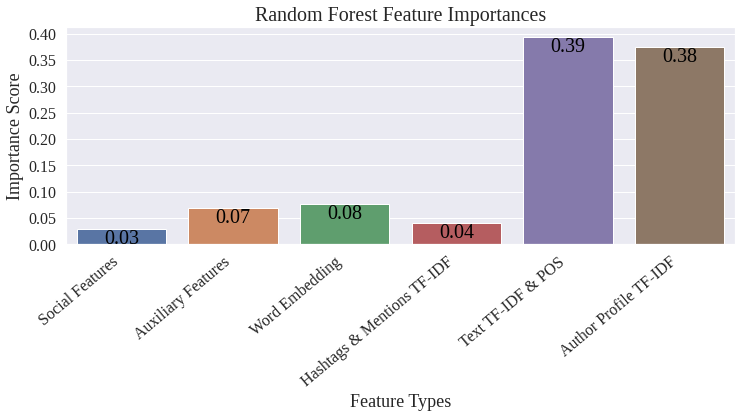

In [22]:

plt.figure(figsize=(12,4))
ax = sns.barplot(data=df, x='Features', y='Importance_Score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=20, color='black', xytext=(0, -10),
                textcoords='offset points')
plt.xlabel('Feature Types', fontsize=18)
plt.xticks(fontsize=16)

plt.ylabel('Importance Score', fontsize=18)
plt.yticks(fontsize=16)

plt.title('Random Forest Feature Importances', fontsize=20)
plt.savefig('RF Feature Importance.png')
plt.show()

In [ ]:
model_RF=df_values2

In [ ]:
model_RF[]

In [ ]:
    print('Tf-idf: ', sum((model_RF[:2000]))) #Words, POS
    print('Tf-idf_hashtag: ', sum((model_RF[2000:4000]))) #
    print('Tf-idf_description: ', sum((model_RF[4000:6000])))
    print('Tf-idf_mentions: ', sum((model_RF[6000:8000])))
    print('Meta_data: ', sum((model_RF[8000:8008])))
    print('Social_Feature: ', sum((model_RF[8008:8017]))) #Interaction
    print('Word_embeeded: ', sum((model_RF[8017:8027])))
    print('feats_dataframe: ', sum((model_RF[8027:8044])))
    print('POS: ', sum((model_RF[8044:-6])))
    print('Emotion: ', sum((model_RF[-6:])))

Tf-idf:  0.3132039841926599
Tf-idf_hashtag:  0.02296908488830947
Tf-idf_description:  0.375210676061787
Tf-idf_mentions:  0.017092955334827926
Meta_data:  0.0148462692152443
Social_Feature:  0.029628779438646922
Word_embeeded:  0.07560248489301759
feats_dataframe:  0.053314498272691795
POS:  0.08031072419905105
Emotion:  0.0178205435036976


The best attributes is  maga (importance: 0.0763474044897339 )
The best attributes is  kag (importance: 0.0441017266926347 )
The best attributes is  conserv (importance: 0.0317124506127656 )
The best attributes is  second_value_wordembedding (importance: 0.0247846045805252 )
The best attributes is  vader compound (importance: 0.023711010023494 )
The best attributes is  god (importance: 0.0119658785113506 )
The best attributes is  fifth_value_wordembedding (importance: 0.0101678169670058 )
The best attributes is  she (importance: 0.0086086083312804 )
The best attributes is  ninth_value_wordembedding (importance: 0.0082833144156303 )
The best attributes is  friends_count (importance: 0.0081360456832498 )
The best attributes is  favourites_count (importance: 0.0079135048106051 )
The best attributes is  liberti (importance: 0.0072018454432323 )
The best attributes is  liber (importance: 0.0066140720079007 )
The best attributes is  god famili (importance: 0.0062229639928749 )
The best attri

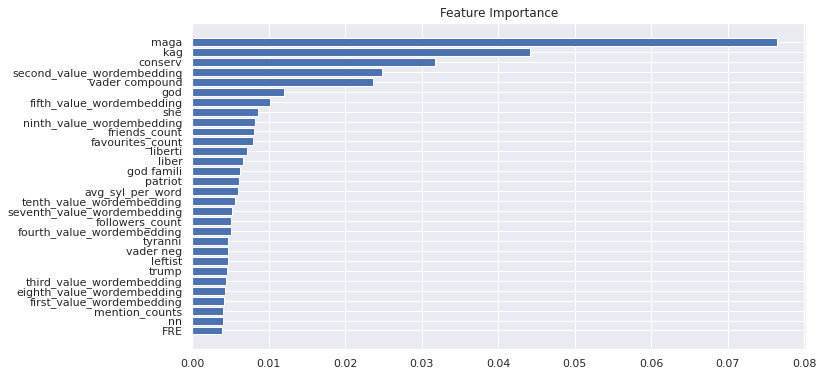

In [ ]:
# dispaly
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
dic = df_indic2[0:30][::-1]
name = df_names2[dic]
value = df_values2[dic]

import seaborn as sns

for i in range(30):
    print("The best attributes is ", name[dic[i]], "(importance:", value[dic[i]],")")
        
plt.figure(figsize=(11, 6))
plt.title("Feature Importance")
plt.barh(range(30), value[dic].values)
plt.yticks(range(30), [name[i] for i in dic])
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 

In [ ]:
import time

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.neural_network import MLPClassifier
def multi_models_running(_X, _y, X_test, y_test):
  print("=================== LinearSVC")
  clf = LinearSVC(class_weight='balanced',C=0.01, penalty='l2', loss='squared_hinge',multi_class='ovr') 
  # start = time.time()
  %time clf.fit(_X, _y)
  # end = time.time()
  # print(end - start, "seconds")
  y_preds1=clf.predict(X_test)
  report = classification_report(y_test, y_preds1) 
  metric(y_preds1, y_test) 

  print("=================== SVC")
  clf = SVC()  
  # start = time.time()
  %time clf.fit(_X, _y)
  # end = time.time()
  # print(end - start, "seconds")
  y_preds2=clf.predict(X_test)
  report = classification_report(y_test, y_preds2) 
  metric(y_preds2, y_test) 

  print("=================== DT")
  clf = DecisionTreeClassifier()
  # start = time.time()
  %time clf.fit(_X, _y)
  # end = time.time()
  # print(end - start, "seconds")
  y_preds3=clf.predict(X_test)
  report = classification_report(y_test, y_preds3) 
  metric(y_preds3, y_test) 
 
  print("=================== RF")
  clf = RandomForestClassifier()
  # start = time.time()
  %time clf.fit(_X, _y)
  # end = time.time()
  # print(end - start, "seconds")
  y_preds4=clf.predict(X_test)
  report = classification_report(y_test, y_preds4) 
  metric(y_preds4, y_test) 
 
  print("=================== LR")
  clf = LogisticRegression()
  # start = time.time()
  %time clf.fit(_X, _y)
  # end = time.time()
  # print(end - start, "seconds")
  y_preds5=clf.predict(X_test)
  report = classification_report(y_test, y_preds5) 
  metric(y_preds5, y_test) 
   
  print("=================== MLP")
  clf = MLPClassifier()
  # start = time.time()
  %time clf.fit(_X, _y)
  # end = time.time()
  # print(end - start, "seconds")
  y_preds6=clf.predict(X_test)
  report = classification_report(y_test, y_preds6) 
  metric(y_preds6, y_test)  

  return y_preds1, y_preds2, y_preds3, y_preds4, y_preds5, y_preds6
  
  

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
#definition of metrics for below questions
def metric(train,prediction):
    A = accuracy_score(train, prediction)#, average='macro')
    P = precision_score(train, prediction, average='macro')
    R = recall_score(train, prediction, average='macro')
    F = f1_score(train, prediction, average='macro')

    print(' Accuracy = ',round(A,2),' Precision = ',round(P,2),' Recall = ',round(R,2),' F1 Score = ',round(F,2))
    return [A, P, R, F]

def AUC_score(train, prediction): 
    Fpr0, Tpr0, T0 = roc_curve(train, prediction)
    AUC1 = roc_auc_score(train,prediction) 
    print(' AUC = ',round(AUC1,2)) 
    return round(AUC1,2)

def ROC_curve(name, index, train, prediction): 
    Fpr0, Tpr0, T0 = roc_curve(train, prediction[:,1])
    plt.figure(figsize=(6, 3))
    plt.clf()
    plt.plot(Fpr0,Tpr0, 'ob', linewidth=5)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title(name+' '+'ROC curve')

In [ ]:
#Accuracy_score
def eval(y_test,predictions,lr_probs,ns_probs):
  # keep probabilities for the positive outcome only
  lr_probs = lr_probs[:, 1]
  # calculate scores
  ns_auc = roc_auc_score(y_test, ns_probs)
  lr_auc = roc_auc_score(y_test, lr_probs)
  # summarize scores
  #rint('No Skill: ROC AUC=%.3f' % (ns_auc))
  print('Accuracy',accuracy_score(y_test,predictions)*100)
  print('Conf Matrix \n',confusion_matrix(y_test,predictions))
  print('F-1 score',f1_score(y_test,predictions))
  print('Recall Score',recall_score(y_test,predictions))
  print('ROC AUC=%.3f' % (lr_auc))
  # calculate roc curves
  ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
  # plot the roc curve for the model
  pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
  pyplot.plot(lr_fpr, lr_tpr, marker='.')
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  # show the legend
  pyplot.legend()
  # show the plot
  pyplot.show()

In [ ]:
old_X_data = X_data.copy()
X_data = X_data.reset_index().drop(columns='index')
X_data.columns = range(X_data.shape[1])
#X_data.columns = range(X_data.shape[1])

In [ ]:
X_data

,0,1,2,3,4,5,6,7,8,9,...,8193,8194,8195,8196,8197,8198,8199,8200,8201,8202
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.030798,0.044462,0.001220,0.912929,0.009740,0.000850
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023893,0.025604,0.0,0.0,0.002076,0.004674,0.000914,0.989619,0.002424,0.000294
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.006554,0.005801,0.000864,0.984225,0.002120,0.000436
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024599,0.026360,0.0,0.0,0.023166,0.403810,0.003502,0.558714,0.009337,0.001471
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.996488,0.000424,0.000185,0.002553,0.000182,0.000168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7511,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.025497,0.018612,0.000938,0.951265,0.003014,0.000674
7512,0.0,0.0,0.152644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.041609,0.044588,0.0,0.0,0.286638,0.003728,0.000830,0.706451,0.001688,0.000665
7513,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.001278,0.000446,0.000211,0.997039,0.000822,0.000204
7514,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.015472,0.036924,0.001753,0.938066,0.006886,0.000898


In [ ]:
# Jihye
#five-fold cross validation
# vindex :validation index 
vindex = 5
type0_y = []
type1_y = [] # to save results with feature selection on additional feature+original feature
type2_y = [] # to save results using orignal feature(non-additional features)
type3_y = [] # to save result without feature selection but with additional feature_original feature
type1_PCA_y = []
type1_PCA_y_100 = []
type1_PCA_y_200 = []
type1_y_200 = []
type1_y_100 = []
maximum_feature = 300 # Jihye: feature number for important features
label_y = []
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
select = StandardScaler()
for i in range(vindex):
  #for i in range(1):
  print("====================", i+1 , " / ", vindex)
  new_X_train, new_ori_X_train, new_y_train, X_train, y_train, X_test, y_test, ori_X_train, ori_X_test, word_X_train, word_X_test = Stratified_Upsampling(i)

  label_y.append(y_test) 
  #new_X_train : upsamled training data X (with features)
  #new_ori_X_train : upsamled original data X
  #new_y_train : upsamled y
  #X_train : non-upsampled training data X (with features)
  #ori_X_train : non-upsampled training data X (origianl, it didn't include additioanl features)  
 
  print("================ version II====================")
  ############################################################### TF-IDF +W2V with social features + Random Forest (II in Table 1 in paper)
  n_new_X_train = new_X_train[df_indic2[0:maximum_feature]] 
  n_new_X_test = X_test[df_indic2[0:maximum_feature]]

  #select = SelectFromModel(LogisticRegression(class_weight='balanced',penalty="l2",C=0.01))
  select.fit(n_new_X_train,new_y_train) 
  scaled_X_train = select.transform(n_new_X_train) 
  scaled_X_test = select.transform(n_new_X_test)  
  y_preds1, y_preds2, y_preds3, y_preds4, y_preds5, y_preds6 = multi_models_running(scaled_X_train, new_y_train, scaled_X_test, y_test) 
  type1_y.append([y_preds1, y_preds2, y_preds3, y_preds4, y_preds5, y_preds6])
  
  print("================ version III + PCA ====================")
  ############################################################## TF-IDF +W2V with social features + Random Forest (III in Table 1 in paper)
  pca = PCA(n_components = 0.95)
  pca.fit(scaled_X_train)
  reduced1 = pca.transform(scaled_X_train)
  reduced2 = pca.transform(scaled_X_test)
  y_preds1, y_preds2, y_preds3, y_preds4, y_preds5, y_preds6 = multi_models_running(reduced1, new_y_train, reduced2, y_test) 
  type1_PCA_y.append([y_preds1, y_preds2, y_preds3, y_preds4, y_preds5, y_preds6])
 
  print("================ version I ====================")
  ############################################################### TF-IDF +W2V with social features + Random Forest (I in Table 1 in paper)
  n_new_X_train = new_X_train
  n_new_X_test = X_test

  #select = SelectFromModel(LogisticRegression(class_weight='balanced',penalty="l2",C=0.01))
  select.fit(n_new_X_train,new_y_train) 

  scaled_X_train = select.transform(n_new_X_train) 
  scaled_X_test = select.transform(n_new_X_test)  
  y_preds1, y_preds2, y_preds3, y_preds4, y_preds5, y_preds6 = multi_models_running(scaled_X_train, new_y_train, scaled_X_test, y_test) 
  type0_y.append([y_preds1, y_preds2, y_preds3, y_preds4, y_preds5, y_preds6])


==================== 1  /  5
================ version II====================
=================== LinearSVC
CPU times: user 4.54 s, sys: 14.6 ms, total: 4.55 s
Wall time: 4.54 s
 Accuracy =  0.83  Precision =  0.81  Recall =  0.78  F1 Score =  0.79
=================== SVC
CPU times: user 13.5 s, sys: 131 ms, total: 13.6 s
Wall time: 13.4 s
 Accuracy =  0.85  Precision =  0.82  Recall =  0.8  F1 Score =  0.81
=================== DT
CPU times: user 1.53 s, sys: 1.86 ms, total: 1.53 s
Wall time: 1.52 s
 Accuracy =  0.73  Precision =  0.64  Recall =  0.64  F1 Score =  0.64
=================== RF
CPU times: user 5.48 s, sys: 8.9 ms, total: 5.49 s
Wall time: 5.47 s
 Accuracy =  0.84  Precision =  0.7  Recall =  0.85  F1 Score =  0.73
=================== LR


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


CPU times: user 811 ms, sys: 198 ms, total: 1.01 s
Wall time: 528 ms
 Accuracy =  0.82  Precision =  0.8  Recall =  0.76  F1 Score =  0.78
=================== MLP
CPU times: user 15.8 s, sys: 8.28 s, total: 24.1 s
Wall time: 12.3 s
 Accuracy =  0.85  Precision =  0.79  Recall =  0.81  F1 Score =  0.8
================ version III + PCA ====================
=================== LinearSVC
CPU times: user 6.06 s, sys: 97.8 ms, total: 6.16 s
Wall time: 6.01 s
 Accuracy =  0.84  Precision =  0.81  Recall =  0.78  F1 Score =  0.8
=================== SVC
CPU times: user 10.5 s, sys: 129 ms, total: 10.6 s
Wall time: 10.5 s
 Accuracy =  0.86  Precision =  0.82  Recall =  0.81  F1 Score =  0.81
=================== DT
CPU times: user 4.21 s, sys: 6.67 ms, total: 4.22 s
Wall time: 4.2 s
 Accuracy =  0.74  Precision =  0.64  Recall =  0.65  F1 Score =  0.64
=================== RF
CPU times: user 16.8 s, sys: 19.6 ms, total: 16.9 s
Wall time: 16.8 s
 Accuracy =  0.82  Precision =  0.67  Recall =  0.82

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


CPU times: user 3min 5s, sys: 1.23 s, total: 3min 6s
Wall time: 3min 5s
 Accuracy =  0.83  Precision =  0.77  Recall =  0.77  F1 Score =  0.77
=================== SVC
CPU times: user 10min 46s, sys: 2.22 s, total: 10min 48s
Wall time: 10min 44s
 Accuracy =  0.85  Precision =  0.75  Recall =  0.83  F1 Score =  0.78
=================== DT
CPU times: user 9.42 s, sys: 17.7 ms, total: 9.44 s
Wall time: 9.43 s
 Accuracy =  0.74  Precision =  0.66  Recall =  0.66  F1 Score =  0.66
=================== RF
CPU times: user 19.3 s, sys: 24.4 ms, total: 19.4 s
Wall time: 19.3 s
 Accuracy =  0.84  Precision =  0.7  Recall =  0.84  F1 Score =  0.74
=================== LR
CPU times: user 18.5 s, sys: 448 ms, total: 19 s
Wall time: 10.7 s
 Accuracy =  0.84  Precision =  0.79  Recall =  0.79  F1 Score =  0.79
=================== MLP
CPU times: user 2min 56s, sys: 1min 26s, total: 4min 23s
Wall time: 2min 14s
 Accuracy =  0.86  Precision =  0.77  Recall =  0.83  F1 Score =  0.79
==================== 2  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


CPU times: user 961 ms, sys: 200 ms, total: 1.16 s
Wall time: 607 ms
 Accuracy =  0.79  Precision =  0.79  Recall =  0.74  F1 Score =  0.75
=================== MLP
CPU times: user 16.5 s, sys: 8.66 s, total: 25.1 s
Wall time: 12.9 s
 Accuracy =  0.84  Precision =  0.79  Recall =  0.79  F1 Score =  0.79
================ version III + PCA ====================
=================== LinearSVC
CPU times: user 7.64 s, sys: 105 ms, total: 7.74 s
Wall time: 7.6 s
 Accuracy =  0.81  Precision =  0.79  Recall =  0.75  F1 Score =  0.77
=================== SVC
CPU times: user 13 s, sys: 163 ms, total: 13.1 s
Wall time: 13 s
 Accuracy =  0.84  Precision =  0.79  Recall =  0.78  F1 Score =  0.79
=================== DT
CPU times: user 3.36 s, sys: 3.61 ms, total: 3.36 s
Wall time: 3.34 s
 Accuracy =  0.72  Precision =  0.6  Recall =  0.61  F1 Score =  0.61
=================== RF
CPU times: user 16.1 s, sys: 18.5 ms, total: 16.1 s
Wall time: 16 s
 Accuracy =  0.81  Precision =  0.64  Recall =  0.81  F1 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


CPU times: user 2min 29s, sys: 1.56 s, total: 2min 31s
Wall time: 2min 30s
 Accuracy =  0.82  Precision =  0.77  Recall =  0.77  F1 Score =  0.77
=================== SVC
CPU times: user 12min 1s, sys: 1.56 s, total: 12min 2s
Wall time: 11min 58s
 Accuracy =  0.85  Precision =  0.76  Recall =  0.83  F1 Score =  0.78
=================== DT
CPU times: user 10.4 s, sys: 376 ms, total: 10.8 s
Wall time: 10.8 s
 Accuracy =  0.72  Precision =  0.64  Recall =  0.64  F1 Score =  0.64
=================== RF
CPU times: user 23.7 s, sys: 41.5 ms, total: 23.7 s
Wall time: 23.6 s
 Accuracy =  0.84  Precision =  0.7  Recall =  0.83  F1 Score =  0.74
=================== LR
CPU times: user 24.1 s, sys: 552 ms, total: 24.6 s
Wall time: 13.6 s
 Accuracy =  0.84  Precision =  0.78  Recall =  0.78  F1 Score =  0.78
=================== MLP
CPU times: user 3min 15s, sys: 1min 37s, total: 4min 52s
Wall time: 2min 30s
 Accuracy =  0.85  Precision =  0.76  Recall =  0.83  F1 Score =  0.78
==================== 3

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


CPU times: user 1.58 s, sys: 285 ms, total: 1.87 s
Wall time: 1.01 s
 Accuracy =  0.8  Precision =  0.78  Recall =  0.74  F1 Score =  0.76
=================== MLP
CPU times: user 21.8 s, sys: 11.7 s, total: 33.5 s
Wall time: 17.3 s
 Accuracy =  0.83  Precision =  0.75  Recall =  0.79  F1 Score =  0.77
================ version III + PCA ====================
=================== LinearSVC
CPU times: user 6.94 s, sys: 117 ms, total: 7.05 s
Wall time: 6.94 s
 Accuracy =  0.82  Precision =  0.79  Recall =  0.77  F1 Score =  0.78
=================== SVC
CPU times: user 15.9 s, sys: 144 ms, total: 16 s
Wall time: 15.8 s
 Accuracy =  0.84  Precision =  0.78  Recall =  0.78  F1 Score =  0.78
=================== DT
CPU times: user 3.86 s, sys: 5.33 ms, total: 3.87 s
Wall time: 3.84 s
 Accuracy =  0.72  Precision =  0.6  Recall =  0.61  F1 Score =  0.61
=================== RF
CPU times: user 17.1 s, sys: 20.9 ms, total: 17.1 s
Wall time: 17 s
 Accuracy =  0.81  Precision =  0.64  Recall =  0.8  F1

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


CPU times: user 2min 58s, sys: 736 ms, total: 2min 59s
Wall time: 2min 58s
 Accuracy =  0.83  Precision =  0.77  Recall =  0.78  F1 Score =  0.77
=================== SVC
CPU times: user 13min 30s, sys: 1.91 s, total: 13min 32s
Wall time: 13min 35s
 Accuracy =  0.85  Precision =  0.75  Recall =  0.83  F1 Score =  0.78
=================== DT
CPU times: user 9.48 s, sys: 635 ms, total: 10.1 s
Wall time: 10.1 s
 Accuracy =  0.75  Precision =  0.67  Recall =  0.67  F1 Score =  0.67
=================== RF
CPU times: user 24.5 s, sys: 75 ms, total: 24.6 s
Wall time: 24.6 s
 Accuracy =  0.83  Precision =  0.69  Recall =  0.83  F1 Score =  0.72
=================== LR
CPU times: user 28.5 s, sys: 708 ms, total: 29.2 s
Wall time: 16.6 s
 Accuracy =  0.84  Precision =  0.78  Recall =  0.79  F1 Score =  0.78
=================== MLP
CPU times: user 4min 30s, sys: 2min 9s, total: 6min 40s
Wall time: 3min 53s
 Accuracy =  0.86  Precision =  0.76  Recall =  0.83  F1 Score =  0.79
==================== 4

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


CPU times: user 1.52 s, sys: 253 ms, total: 1.78 s
Wall time: 928 ms
 Accuracy =  0.81  Precision =  0.79  Recall =  0.76  F1 Score =  0.77
=================== MLP
CPU times: user 25 s, sys: 13.9 s, total: 38.9 s
Wall time: 20.2 s
 Accuracy =  0.84  Precision =  0.77  Recall =  0.79  F1 Score =  0.78
================ version III + PCA ====================
=================== LinearSVC
CPU times: user 4.23 s, sys: 110 ms, total: 4.34 s
Wall time: 4.23 s
 Accuracy =  0.81  Precision =  0.77  Recall =  0.75  F1 Score =  0.76
=================== SVC
CPU times: user 18.4 s, sys: 155 ms, total: 18.5 s
Wall time: 18.5 s
 Accuracy =  0.84  Precision =  0.8  Recall =  0.79  F1 Score =  0.79
=================== DT
CPU times: user 4.15 s, sys: 3.93 ms, total: 4.15 s
Wall time: 4.18 s
 Accuracy =  0.73  Precision =  0.61  Recall =  0.63  F1 Score =  0.62
=================== RF
CPU times: user 17.7 s, sys: 27.9 ms, total: 17.8 s
Wall time: 17.8 s
 Accuracy =  0.81  Precision =  0.64  Recall =  0.8 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


CPU times: user 3min 5s, sys: 1.46 s, total: 3min 6s
Wall time: 3min 34s
 Accuracy =  0.82  Precision =  0.75  Recall =  0.76  F1 Score =  0.76
=================== SVC
CPU times: user 13min 31s, sys: 2.45 s, total: 13min 33s
Wall time: 13min 26s
 Accuracy =  0.85  Precision =  0.75  Recall =  0.82  F1 Score =  0.78
=================== DT
CPU times: user 8.1 s, sys: 5.45 ms, total: 8.1 s
Wall time: 8.07 s
 Accuracy =  0.72  Precision =  0.63  Recall =  0.62  F1 Score =  0.63
=================== RF
CPU times: user 20.2 s, sys: 27.1 ms, total: 20.3 s
Wall time: 20.1 s
 Accuracy =  0.83  Precision =  0.7  Recall =  0.84  F1 Score =  0.73
=================== LR
CPU times: user 19.1 s, sys: 484 ms, total: 19.6 s
Wall time: 11.3 s
 Accuracy =  0.83  Precision =  0.77  Recall =  0.78  F1 Score =  0.78
=================== MLP
CPU times: user 3min 5s, sys: 1min 32s, total: 4min 38s
Wall time: 2min 22s
 Accuracy =  0.86  Precision =  0.78  Recall =  0.84  F1 Score =  0.8
==================== 5  /

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


CPU times: user 1.49 s, sys: 259 ms, total: 1.74 s
Wall time: 908 ms
 Accuracy =  0.82  Precision =  0.81  Recall =  0.77  F1 Score =  0.78
=================== MLP
CPU times: user 24.4 s, sys: 13.1 s, total: 37.5 s
Wall time: 19.3 s
 Accuracy =  0.86  Precision =  0.79  Recall =  0.82  F1 Score =  0.8
================ version III + PCA ====================
=================== LinearSVC
CPU times: user 9.79 s, sys: 128 ms, total: 9.92 s
Wall time: 9.82 s
 Accuracy =  0.84  Precision =  0.81  Recall =  0.78  F1 Score =  0.79
=================== SVC
CPU times: user 16 s, sys: 112 ms, total: 16.1 s
Wall time: 15.9 s
 Accuracy =  0.86  Precision =  0.82  Recall =  0.82  F1 Score =  0.82
=================== DT
CPU times: user 3.85 s, sys: 5.14 ms, total: 3.86 s
Wall time: 3.83 s
 Accuracy =  0.71  Precision =  0.6  Recall =  0.61  F1 Score =  0.61
=================== RF
CPU times: user 16.6 s, sys: 18.2 ms, total: 16.6 s
Wall time: 16.5 s
 Accuracy =  0.81  Precision =  0.64  Recall =  0.81 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


CPU times: user 2min 38s, sys: 1.66 s, total: 2min 39s
Wall time: 2min 39s
 Accuracy =  0.82  Precision =  0.76  Recall =  0.76  F1 Score =  0.76
=================== SVC
CPU times: user 10min 37s, sys: 1.19 s, total: 10min 38s
Wall time: 10min 38s
 Accuracy =  0.84  Precision =  0.75  Recall =  0.81  F1 Score =  0.77
=================== DT
CPU times: user 9.8 s, sys: 501 ms, total: 10.3 s
Wall time: 10.3 s
 Accuracy =  0.74  Precision =  0.67  Recall =  0.66  F1 Score =  0.66
=================== RF
CPU times: user 18.9 s, sys: 14.1 ms, total: 19 s
Wall time: 19 s
 Accuracy =  0.85  Precision =  0.71  Recall =  0.86  F1 Score =  0.75
=================== LR
CPU times: user 19.9 s, sys: 377 ms, total: 20.3 s
Wall time: 11.5 s
 Accuracy =  0.83  Precision =  0.78  Recall =  0.77  F1 Score =  0.77
=================== MLP
CPU times: user 4min 3s, sys: 1min 58s, total: 6min 2s
Wall time: 3min 4s
 Accuracy =  0.87  Precision =  0.78  Recall =  0.87  F1 Score =  0.81


In [ ]:
total_type1_y=[]
fordata=type0_y ########################################################################## Table 1. I
for i in range(len(fordata)): 
  print("===== validation: ", i)
  buffer = []
  for j in range(len(fordata[i])):
    buffer.append(metric(fordata[i][j], label_y[i]))
  total_type1_y.append(buffer) 

df = pd.DataFrame(total_type1_y)
df.to_csv("0_2.csv")

===== validation:  0
 Accuracy =  0.83  Precision =  0.77  Recall =  0.78  F1 Score =  0.77
 Accuracy =  0.85  Precision =  0.75  Recall =  0.83  F1 Score =  0.78
 Accuracy =  0.73  Precision =  0.65  Recall =  0.65  F1 Score =  0.65
 Accuracy =  0.84  Precision =  0.71  Recall =  0.85  F1 Score =  0.74
 Accuracy =  0.84  Precision =  0.79  Recall =  0.79  F1 Score =  0.79
 Accuracy =  0.86  Precision =  0.75  Recall =  0.85  F1 Score =  0.78
===== validation:  1
 Accuracy =  0.83  Precision =  0.77  Recall =  0.77  F1 Score =  0.77
 Accuracy =  0.85  Precision =  0.76  Recall =  0.82  F1 Score =  0.78
 Accuracy =  0.73  Precision =  0.66  Recall =  0.65  F1 Score =  0.65
 Accuracy =  0.83  Precision =  0.7  Recall =  0.82  F1 Score =  0.73
 Accuracy =  0.84  Precision =  0.78  Recall =  0.78  F1 Score =  0.78
 Accuracy =  0.86  Precision =  0.8  Recall =  0.81  F1 Score =  0.8
===== validation:  2
 Accuracy =  0.83  Precision =  0.76  Recall =  0.77  F1 Score =  0.77
 Accuracy =  0.85

In [ ]:
total_type1_y=[]
fordata=type1_y ########################################################################## Table 1. II
for i in range(len(fordata)): 
  print("===== validation: ", i)
  buffer = []
  for j in range(len(fordata[i])):
    buffer.append(metric(fordata[i][j], label_y[i]))
  total_type1_y.append(buffer) 

df = pd.DataFrame(total_type1_y)
df.to_csv("1_2.csv")

===== validation:  0
 Accuracy =  0.83  Precision =  0.8  Recall =  0.77  F1 Score =  0.78
 Accuracy =  0.85  Precision =  0.81  Recall =  0.8  F1 Score =  0.8
 Accuracy =  0.74  Precision =  0.64  Recall =  0.65  F1 Score =  0.64
 Accuracy =  0.83  Precision =  0.69  Recall =  0.84  F1 Score =  0.72
 Accuracy =  0.81  Precision =  0.8  Recall =  0.76  F1 Score =  0.77
 Accuracy =  0.85  Precision =  0.79  Recall =  0.81  F1 Score =  0.8
===== validation:  1
 Accuracy =  0.81  Precision =  0.79  Recall =  0.76  F1 Score =  0.77
 Accuracy =  0.84  Precision =  0.8  Recall =  0.79  F1 Score =  0.79
 Accuracy =  0.73  Precision =  0.64  Recall =  0.64  F1 Score =  0.64
 Accuracy =  0.82  Precision =  0.68  Recall =  0.81  F1 Score =  0.71
 Accuracy =  0.79  Precision =  0.78  Recall =  0.73  F1 Score =  0.75
 Accuracy =  0.84  Precision =  0.78  Recall =  0.79  F1 Score =  0.79
===== validation:  2
 Accuracy =  0.83  Precision =  0.79  Recall =  0.77  F1 Score =  0.78
 Accuracy =  0.84  P

In [ ]:
total_type1_y=[]
fordata=type1_PCA_y ########################################################################## Table 1. III
for i in range(len(fordata)): 
  print("===== validation: ", i)
  buffer = []
  for j in range(len(fordata[i])):
    buffer.append(metric(fordata[i][j], label_y[i]))
  total_type1_y.append(buffer) 

df = pd.DataFrame(total_type1_y)
df.to_csv("1_PCA_2.csv")

===== validation:  0
 Accuracy =  0.84  Precision =  0.81  Recall =  0.78  F1 Score =  0.79
 Accuracy =  0.85  Precision =  0.81  Recall =  0.8  F1 Score =  0.8
 Accuracy =  0.71  Precision =  0.58  Recall =  0.6  F1 Score =  0.59
 Accuracy =  0.81  Precision =  0.64  Recall =  0.83  F1 Score =  0.66
 Accuracy =  0.82  Precision =  0.82  Recall =  0.77  F1 Score =  0.79
 Accuracy =  0.86  Precision =  0.79  Recall =  0.81  F1 Score =  0.8
===== validation:  1
 Accuracy =  0.81  Precision =  0.79  Recall =  0.75  F1 Score =  0.77
 Accuracy =  0.84  Precision =  0.79  Recall =  0.78  F1 Score =  0.79
 Accuracy =  0.72  Precision =  0.6  Recall =  0.61  F1 Score =  0.61
 Accuracy =  0.8  Precision =  0.63  Recall =  0.78  F1 Score =  0.64
 Accuracy =  0.79  Precision =  0.78  Recall =  0.74  F1 Score =  0.75
 Accuracy =  0.83  Precision =  0.77  Recall =  0.78  F1 Score =  0.78
===== validation:  2
 Accuracy =  0.82  Precision =  0.79  Recall =  0.76  F1 Score =  0.77
 Accuracy =  0.84  P

In [ ]:
print("Done!")

Done!
